In [16]:
from sre_compile import isstring
import numpy as np
import math

In [17]:
def axis_rotation(angle, axis):
    """
    Takes in an angle in degrees and a axis to rotate around and returns rotation matrix.

        Parameters:
                angle (float): Angle of rotation
                axis (str): Axis of rotation ('x','y', or 'z') 

        Returns:
                Rotation matrix of angle about axis of rotation entered
    """
    #convert angle from degrees to radians
    angle_rad = math.radians(angle)
    
    #Define s as sin(angle in radians)
    s = np.sin(angle_rad)
    #Define c as sin(angle in radians)
    c = np.cos(angle_rad)

    if axis == 'x':
        Rx = np.array([(1, 0, 0),
                       (0, c, -s),
                       (0, s, c)], dtype=float)
        return (Rx)
    elif axis == 'y':
        Ry = np.array([(c, 0, s),
                       (0, 1, 0),
                       (-s, 0, c)], dtype=float)
        return (Ry)
    elif axis == 'z':
        Rx = np.array([(c, -s, 0),
                       (s, c, 0),
                       (0, 0, 1)], dtype=float)
        return (Rx)
    else:
        print("Error")



def custom_axis_rotation(angle, axis_vector):
    """
    Takes in an angle in degrees and a custom axis vector to rotate around and returns rotation matrix.

        Parameters:
                angle (float): Angle of rotation
                axis_vector (np.array): Custom Axis of rotation vector array ([0, 0, 0]) 

        Returns:
                Rotation matrix of angle about custom axis vector of rotation entered
    """

      #convert angle from degrees to radians
    angle_rad = math.radians(angle)
    
    #Define s as sin(angle in radians)
    s = np.sin(angle_rad)
    #Define c as sin(angle in radians)
    c = np.cos(angle_rad)

    #Normalizes the axis vector
    axis_vector_norm = axis_vector / np.linalg.norm(axis_vector)

    v = 1 - c
   
   #Define x, y, z of normalized vector
    x = axis_vector_norm[0]
    y = axis_vector_norm[1]
    z = axis_vector_norm[2]
  
    #Break down of custom axis rotation matrix calculations
    aa = x*x*v+c
    ab = x*y*v-z*s
    ac = x*z*v+y*s
    
    ba = x*y*v+z*s
    bb = y*y*v+c
    bc = y*z*v-x*s

    ca = x*z*v-y*s
    cb = y*z*v+x*s
    cc = z*z*v+c

    custom_axis_rotation_matrix = np.array([(aa, ab, ac),
                                            (ba, bb, bc),
                                            (ca, cb, cc)], dtype=float)

    return custom_axis_rotation_matrix



def custom_transform(angle, axis, pos):
    """
    Takes in an angle in degrees and rotation axis of the base frame or custom axis vector to rotate around
    and the subsequent 1x3 translation vector  and returns the transform rotation matrix.
        Parameters:
                angle (float): Angle of rotation
                axis (np.array or str): Custom Axis of rotation vector array ([0, 0, 0]) or str for axis of rotation ('x','y', or 'z')
                pos (np.array): Translation vector in a 1x3 matrix
        Returns:
                Rotation transform matrix of a angle about rotation axis of the base frame or custom axis vector of rotation by the custom translation vector entered
    """
    #Check if axis is a string
    if isstring(axis) == 1:
        #Check if axis is rotation about axis x, y, or z
        if axis == 'x' or axis == 'y' or axis == 'z':
            r_m = axis_rotation(angle, axis)
    elif axis.size == 3:
        r_m = custom_axis_rotation(angle, axis)
    
    t_v = pos

    transform_matrix = np.array([(r_m[0,0], r_m[0,1], r_m[0,2], t_v[0]),
                                 (r_m[1,0], r_m[1,1], r_m[1,2], t_v[1]),
                                 (r_m[2,0], r_m[2,1], r_m[2,2], t_v[2]),
                                 (0, 0, 0, 1)], dtype=float)
    return transform_matrix




In [18]:
#Rodrigues Rotation Function
def rodrigues_rot(v, k, theta):
    #print(v)
    [m,n] = v.shape
    #print(m)
    #print(n)
    
    if ((m!=3) and (n!=3)):
        print("Error: Input vector is not three dimensional")
    elif ((v.size) != (k.size)):
        #print(v.shape)
        #print(k.shape)
        print("Error: Rotation vector v and axis k have different dimensions")                                                                                      
    
    k = k/math.sqrt(k[0]**2 + k[1]**2 + k[2]**2) #Normalize roation axis
    #print(k)

    No = v.size / 3 #number of vectors in array

    v_rot = np.empty((m,n))
    #v_rot = v #initialize rotated vector array
    #print(v_rot)

    if (n == 3):
        crosskv = v[0,] #initialize cross product k and v with right dim
        #print(crosskv)
        for i in range (int(No)):
            v_row = (v[i,])
            crosskv[0] = k[1] * v[i,2] - k[2] * v[i,1] 
            crosskv[1] = k[2] * v[i,0] - k[0] * v[i,2] 
            crosskv[2] = k[0] * v[i,1] - k[1] * v[i,0]
            v_rot[i,] = np.cos(theta) * v_row + (crosskv) * np.sin(theta) + k * (np.dot(k,v_row)) * (1 - np.cos(theta))
    
    else: #If m == 3 and n != 3
        crosskv = v[:,0] #Initalize cross product k and v with right dim
        for i in range (int(No)):
            crosskv[0] = k[1] * v[2,i] - k[2] * v[1,i] 
            crosskv[1] = k[2] * v[0,i] - k[0] * v[2,i] 
            crosskv[2] = k[0] * v[1,i] - k[1] * v[0,i]
            v_rot[:,i] = np.cos(theta) * v[:,i] + (crosskv) * np.sin(theta) + k * (np.dot(k,(v[:,i]))) * (1 - np.cos(theta)) 
    return v_rot   


In [4]:
v = np.array([
    [0.2,0,0.83],
    [0.2,0,0.83],
    [0.0,0.05,0],
    [0.5,0.25,0.1],
    [0.2,0.5,0.40],
    [0.65,0.55,0.2]], dtype=float)
    
k = np.array([0,1,0])

thetaPitch = 1.0472

In [8]:
rod_rot = rodrigues_rot(v,k,thetaPitch)
print(rod_rot)

Error: Rotation vector v and axis k have different dimensions
[[-0.88791593  0.          0.88791593]
 [ 0.81880168  0.          0.24179291]
 [ 0.          0.05        0.        ]
 [ 0.3366016   0.25       -0.38301353]
 [ 0.44641023  0.5         0.02679383]
 [ 0.49820395  0.55       -0.46291773]]


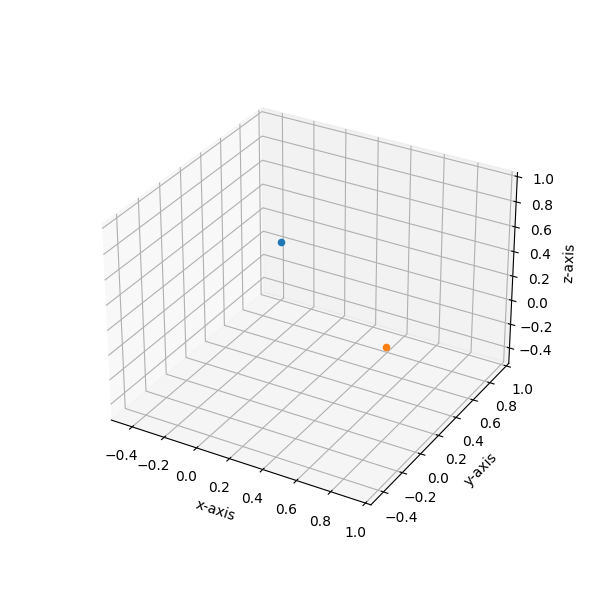

In [6]:
#Testing 3D Plots

%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(0.2,0,0.83) # plot the point (2,3,4) on the figure
ax.scatter3D(0.81880168, 0, 0.24179291)
X, Y, Z, U, V, W = [0, 1, 0, 0, 0, 0]
ax.set_xlim([-0.5, 1])
ax.set_ylim([-0.5, 1])
ax.set_zlim([-0.5, 1])

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

plt.show()


In [15]:
custom_rot_matrix = custom_axis_rotation(25 ,rod_rot[1]) 

print(rod_rot[4])

test = np.array([[0.44641023],
    [0.5],
    [0.02679383]])

print(test)


print( np.dot(custom_rot_matrix, test))

#print( np.multiply(custom_rot_matrix, (rod_rot[4])))


[0.44641023 0.5        0.02679383]
[[0.44641023]
 [0.5       ]
 [0.02679383]]
[[0.38389236]
 [0.49572478]
 [0.23850282]]


In [22]:
custom_test = custom_transform(25 , rod_rot[2] ,rod_rot[1])
print(custom_test)

test1 = np.array([[0.44641023],
    [0.5],
    [0.02679383],
    [1]])

print(np.dot(custom_test, test1))

[[ 0.90630779  0.          0.42261826  0.81880168]
 [ 0.          1.          0.          0.        ]
 [-0.42261826  0.          0.90630779  0.24179291]
 [ 0.          0.          0.          1.        ]]
[[1.23471031]
 [0.5       ]
 [0.07741526]
 [1.        ]]
